<a href="https://colab.research.google.com/github/DenisVasil/Keras_2023/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras

In [43]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
fashion_mnist.load_data()

In [45]:
(X_train_full, y_train_full), (X_test, y_test) = (fashion_mnist.load_data())

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [46]:
X_valid, X_train = X_train_full[:5000]/225.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [47]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
class_names[y_train[2]]

'Sneaker'

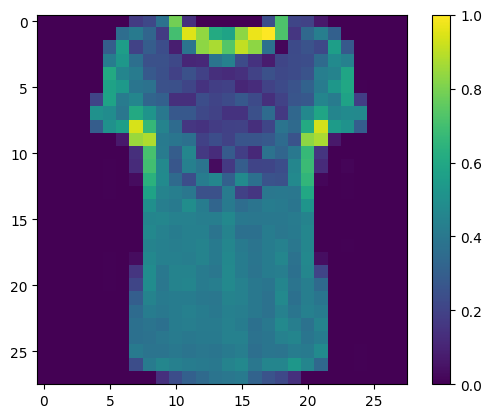

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [48]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [49]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.layers

In [50]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics='accuracy')

In [20]:
history= model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 3ms/step - loss: 0.7213 - accuracy: 0.7657 - val_loss: 0.5022 - val_accuracy: 0.8312
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4858 - accuracy: 0.8338 - val_loss: 0.4554 - val_accuracy: 0.8428
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4418 - accuracy: 0.8465 - val_loss: 0.4406 - val_accuracy: 0.8520
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4143 - accuracy: 0.8549 - val_loss: 0.3934 - val_accuracy: 0.8678
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3955 - accuracy: 0.8608 - val_loss: 0.3820 - val_accuracy: 0.8718
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3787 - accuracy: 0.8678 - val_loss: 0.3727 - val_accuracy: 0.8716
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3659 - accuracy: 0.8707 - val_loss: 0.3742 - val_accuracy

In [51]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
history= model.fit(X_train, y_train, epochs=300,
                   validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/300
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7160 - accuracy: 0.7644 - val_loss: 0.5023 - val_accuracy: 0.8246
Epoch 2/300
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4864 - accuracy: 0.8318 - val_loss: 0.4516 - val_accuracy: 0.8432
Epoch 3/300
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4422 - accuracy: 0.8448 - val_loss: 0.4917 - val_accuracy: 0.8394
Epoch 4/300
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4132 - accuracy: 0.8550 - val_loss: 0.4180 - val_accuracy: 0.8574
Epoch 5/300
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3945 - accuracy: 0.8603 - val_loss: 0.3996 - val_accuracy: 0.8618
Epoch 6/300
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3785 - accuracy: 0.8655 - val_loss: 0.3817 - val_accuracy: 0.8656
Epoch 7/300
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3650 - accuracy: 0.8703 - val_loss: 0.3739 - val_ac

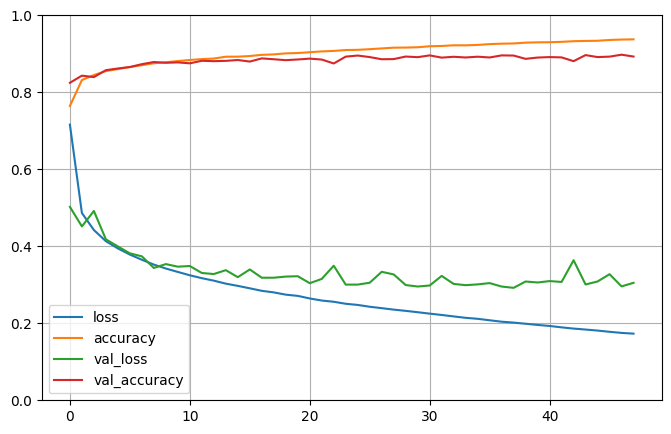

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 70.8119 - accuracy: 0.8461


[70.81190490722656, 0.8460999727249146]

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 79ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
import  numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 18ms/step


array([9, 2, 1])

In [25]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [26]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_train.shape[1:])

(11610, 8)
(8,)


In [28]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu",
                       input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
    ])

In [29]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [30]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7696 - val_loss: 0.5134
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7086 - val_loss: 0.4755
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4828 - val_loss: 0.4427
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4563 - val_loss: 0.4228
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3954 - val_loss: 0.4008
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3847 - val_loss: 0.3933
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3792 - val_loss: 0.3889
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3743 - val_loss: 0.3965
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3707 - val_loss: 0.3854
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3691 - val_loss: 0.3823

In [39]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3464 - val_loss: 0.3693
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3478 - val_loss: 0.3609
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3460 - val_loss: 0.3590
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3424 - val_loss: 0.3587
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3403 - val_loss: 0.3601
Epoch 6/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3408 - val_loss: 0.3561
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3404 - val_loss: 0.3578
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3368 - val_loss: 0.4381
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4654 - val_loss: 0.3622
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3410 - val_lo

In [31]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3572


In [32]:
mse_test

0.357193261384964

In [33]:
X_new=X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 41ms/step


In [34]:
y_pred

array([[1.6681243],
       [1.2151215],
       [2.9660177]], dtype=float32)

In [35]:
y_new = y_test[:3]

In [36]:
y_new

array([1.465, 0.92 , 2.247])

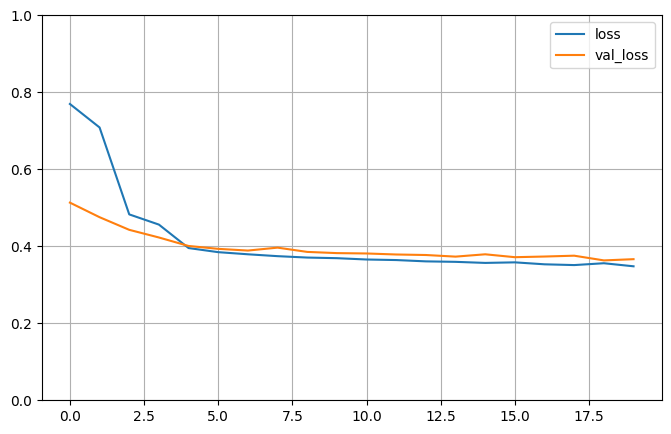

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [38]:
print(y_test)

[1.465 0.92  2.247 ... 1.214 4.116 1.353]


In [53]:
#AutoKerasimport tensorflow as tf
import tensorflow as tf
from tensorflow import keras
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
!pip install autokeras

In [55]:
import autokeras as ak
clf = ak.ImageClassifier(max_trials=2)
clf.fit(x_train, y_train, epochs=3)

Trial 2 Complete [00h 26m 58s]
val_loss: 0.23473124206066132

Best val_loss So Far: 0.04880864545702934
Total elapsed time: 00h 27m 38s
Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1570 - accuracy: 0.9522
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0725 - accuracy: 0.9772
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0586 - accuracy: 0.9815


In [56]:
test_loss, test_acc = clf.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0387 - accuracy: 0.9864


In [58]:
predicted_y = clf.predict(x_test)
print(predicted_y)

313/313 [==============================] - 1s 2ms/step
[['7']
 ['2']
 ['1']
 ...
 ['4']
 ['5']
 ['6']]


In [59]:
best_model = clf.export_model()
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 28, 28)           0         
 t32)                                                            
                                                                 
 expand_last_dim (ExpandLast  (None, 28, 28, 1)        0         
 Dim)                                                            
                                                                 
 normalization (Normalizatio  (None, 28, 28, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                             

In [60]:
from keras.models import load_model
best_model.save('model_autokeras')
loaded_model = load_model('model_autokeras')

In [64]:
predicted_y = loaded_model.predict(x_test)
print(predicted_y)

313/313 [==============================] - 1s 2ms/step
[[1.9186785e-09 1.9857536e-11 5.9265876e-08 ... 9.9999940e-01
  1.0446010e-09 3.0615840e-07]
 [1.1597050e-06 1.9461527e-06 9.9997437e-01 ... 1.8753652e-13
  2.0423747e-06 1.8092906e-11]
 [8.1879797e-08 9.9974507e-01 1.6640659e-05 ... 1.5665928e-05
  8.6572672e-06 1.6978434e-07]
 ...
 [3.9845276e-12 6.2258426e-10 1.1390942e-11 ... 1.0561076e-07
  1.8761220e-06 3.8797467e-07]
 [3.1409176e-08 4.3713579e-12 8.1706747e-10 ... 9.4483976e-11
  1.0006874e-05 9.3889811e-09]
 [1.1678912e-07 1.0165173e-12 7.2273544e-08 ... 1.2927905e-13
  2.2297813e-07 1.4762128e-10]]
